In [1]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [2]:
#Run the below code in your notebook to check the installed version
import pandas as pd
from pycaret.utils import version
version()
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
import shap
import matplotlib.pyplot as plt
from pycaret.classification import *
%matplotlib inline

1.0.0


In [3]:
data=pd.read_csv('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/var150_LH_valid_binary_normdata.csv',index_col=0)

In [4]:
data['binary'].value_counts()

Others      2787
LH_valid     769
Name: binary, dtype: int64

In [5]:
data.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_1_AAACCCAAGTCGTTAC,0.0,0.000000,0.0,1.147602,0.0,0.0,0.000000,0.000000,1.147602,0.0,...,2.262026,0.000000,0.0,2.901699,0.000000,0.0,1.667945,1.147602,1.147602,Others
pfc_1_AAAGGGCGTGGCATCC,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,3.364502,0.0,0.000000,0.000000,0.0,2.595888,1.411504,1.411504,Others
pfc_1_AACCCAATCCGCTTAC,0.0,1.034382,0.0,0.000000,0.0,0.0,1.034382,0.000000,0.000000,0.0,...,2.110634,0.000000,0.0,0.000000,0.000000,0.0,2.110634,0.000000,0.000000,Others
pfc_1_AAGAACAAGAGAGCCT,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.656318,0.0,...,1.656318,0.000000,0.0,0.000000,1.137830,0.0,1.656318,0.000000,0.000000,Others
pfc_1_ACAAGCTCAAAGCACG,0.0,0.818405,0.0,0.818405,0.0,0.0,0.000000,0.818405,1.262363,0.0,...,0.818405,0.000000,0.0,0.818405,0.818405,0.0,0.818405,0.000000,0.000000,Others


In [6]:
# df=shuffle(data,random_state=30)
# df.head()

In [19]:
#df.to_csv('var150_LH_valid_binary_normdata_shuffle.csv')

In [20]:
#df=pd.read_csv('var150_LH_valid_binary_normdata_shuffle.csv',index_col=0)

In [6]:
data['binary']=pd.factorize(data['binary'])[0]

In [7]:
data.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_1_AAACCCAAGTCGTTAC,0.0,0.000000,0.0,1.147602,0.0,0.0,0.000000,0.000000,1.147602,0.0,...,2.262026,0.000000,0.0,2.901699,0.000000,0.0,1.667945,1.147602,1.147602,0
pfc_1_AAAGGGCGTGGCATCC,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,3.364502,0.0,0.000000,0.000000,0.0,2.595888,1.411504,1.411504,0
pfc_1_AACCCAATCCGCTTAC,0.0,1.034382,0.0,0.000000,0.0,0.0,1.034382,0.000000,0.000000,0.0,...,2.110634,0.000000,0.0,0.000000,0.000000,0.0,2.110634,0.000000,0.000000,0
pfc_1_AAGAACAAGAGAGCCT,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.656318,0.0,...,1.656318,0.000000,0.0,0.000000,1.137830,0.0,1.656318,0.000000,0.000000,0
pfc_1_ACAAGCTCAAAGCACG,0.0,0.818405,0.0,0.818405,0.0,0.0,0.000000,0.818405,1.262363,0.0,...,0.818405,0.000000,0.0,0.818405,0.818405,0.0,0.818405,0.000000,0.000000,0


In [8]:
exp1 = setup(data, target = 'binary',session_id=1)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3556, 151)"
4,Missing Values,False
5,Numeric Features,150
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8153,0.8785,0.3019,0.6400,0.4103,0.3171
1,0.8233,0.8675,0.4815,0.6190,0.5417,0.4343
2,0.7912,0.8785,0.5370,0.5179,0.5273,0.3933
3,0.8233,0.8697,0.5926,0.5926,0.5926,0.4798
4,0.8032,0.8562,0.4074,0.5641,0.4731,0.3560
5,0.8032,0.8623,0.4815,0.5532,0.5149,0.3922
6,0.8112,0.8924,0.3519,0.6129,0.4471,0.3432
7,0.8313,0.9042,0.4444,0.6667,0.5333,0.4354
8,0.8514,0.9129,0.4815,0.7429,0.5843,0.4988
9,0.8468,0.9217,0.5283,0.6829,0.5957,0.5031


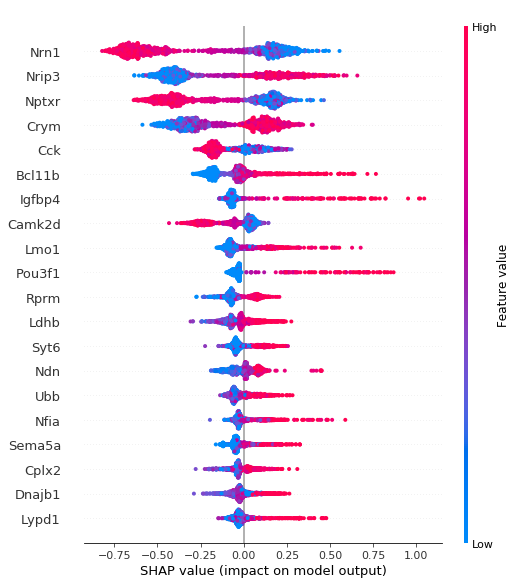

In [11]:
interpret_model(tuned_xgboost)

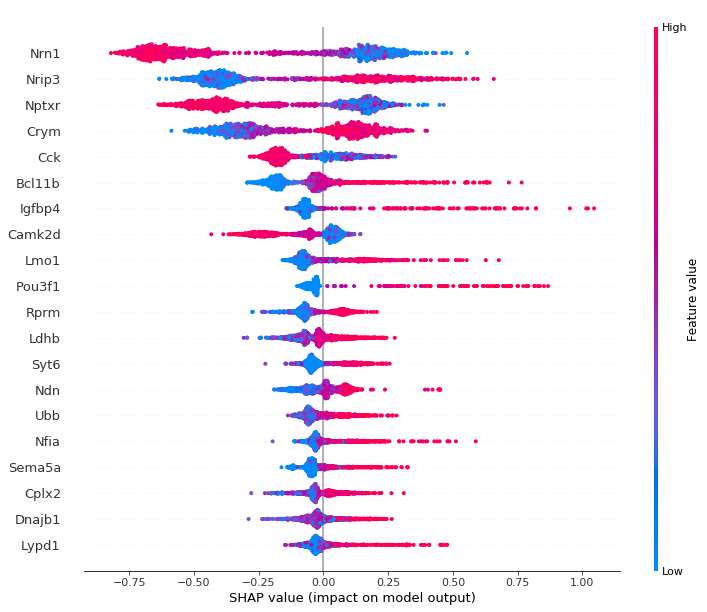

In [12]:
explainer = shap.TreeExplainer(tuned_xgboost)
shap_values = explainer.shap_values(exp1[3])
f = shap.summary_plot(shap_values, exp1[3],show=False)
f = plt.gcf()
f.set_size_inches(12, 10)
f.savefig('LH shap plot seed.png', dpi=300)

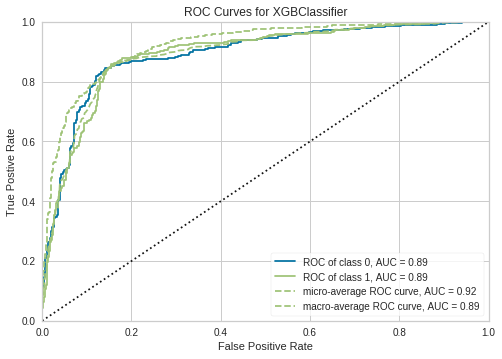

In [232]:
plot_model(tuned_xgboost, plot = 'auc')

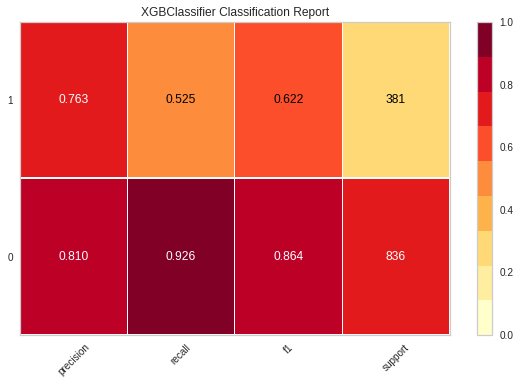

In [52]:
plot_model(tuned_xgboost, plot = 'class_report')

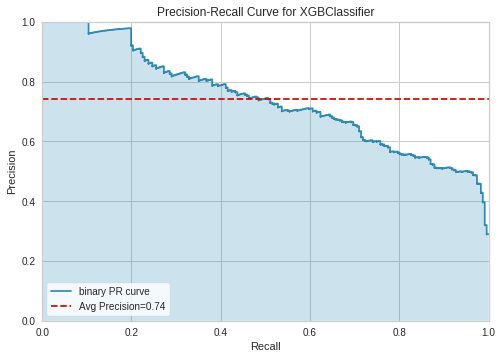

In [34]:
plot_model(tuned_xgboost, plot = 'pr')

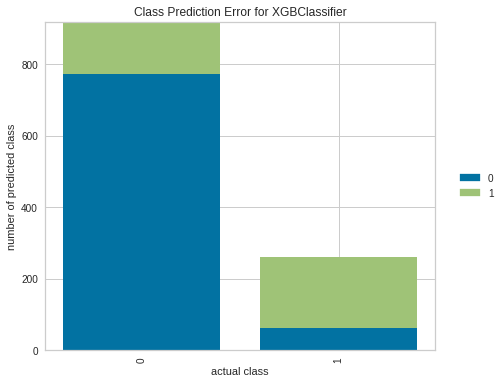

In [57]:
plot_model(tuned_xgboost,plot = 'error')

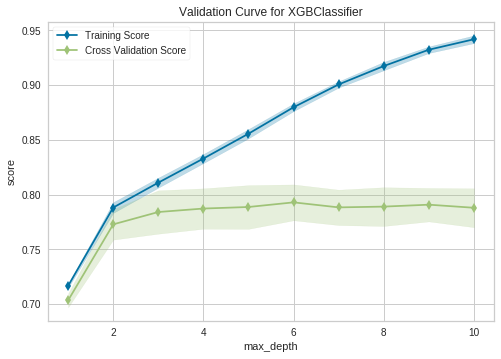

In [59]:
plot_model(tuned_xgboost, plot = 'vc')

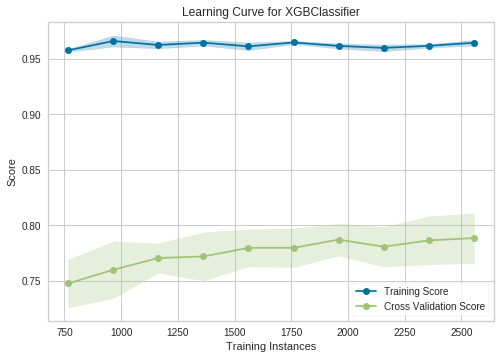

In [61]:
plot_model(tuned_xgboost, plot = 'learning')

In [13]:
save_experiment('Experiment_LH_19July2020')

Experiment Succesfully Saved


In [14]:
saved_experiment = load_experiment('Experiment_LH_19July2020')


,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Tuned XGBClassifier
7,Tuned XGBClassifier Score Grid


In [16]:
from sklearn.model_selection import train_test_split
from pycaret import preprocess
from sklearn import metrics

X = exp1[3]
y = exp1[5]

# Number of random trials
NUM_TRIALS = 10
d = []
for i in range(NUM_TRIALS):
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y,stratify=y, test_size=0.9,  random_state=i)
    pred_ =tuned_xgboost.predict(X_test)
    pred_prob = tuned_xgboost.predict_proba(X_test)[:,1]
    acc = metrics.accuracy_score(y_test,pred_)
    auc = metrics.roc_auc_score(y_test,pred_prob)
    prec = metrics.precision_score(y_test,pred_)
    f1 = metrics.f1_score(y_test,pred_)
    recall = metrics.recall_score(y_test,pred_)
    kappa = metrics.cohen_kappa_score(y_test,pred_)
    d.append(
        {
           'Accuracy' : acc, 'AUC': auc, 'F1' : f1, 'Precision':prec, 'Recall':recall, 'Kappa':kappa
        }
    )
    model_results=pd.DataFrame(d)


In [17]:
model_results

,AUC,Accuracy,F1,Kappa,Precision,Recall
0,0.915032,0.856400,0.607955,0.523587,0.743056,0.514423
1,0.911987,0.850156,0.595506,0.506737,0.716216,0.509615
2,0.910678,0.848075,0.580460,0.491991,0.721429,0.485577
3,0.913072,0.854318,0.604520,0.518568,0.732877,0.514423
4,0.908628,0.849116,0.586895,0.498440,0.720280,0.495192
5,0.913442,0.854318,0.600000,0.514783,0.739437,0.504808
6,0.913532,0.852237,0.598870,0.511690,0.726027,0.509615
7,0.912995,0.853278,0.593660,0.508418,0.741007,0.495192
8,0.917318,0.858481,0.611429,0.528646,0.753521,0.514423
9,0.915019,0.855359,0.603989,0.519194,0.741259,0.509615
